# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**

The project uses Convolutional Neural Networks to classify the Street View Housing Numbers (SVHN) image dataset for this project.

---
### **Context:** 
---

Deep learning can be applied to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

---
### **Objective:**
---

Build a CNN model that can identify the digits in the images.

---
### **Dataset**
---

The data is part of a Kaggle competition and can be downloaded at: https://www.kaggle.com/stanfordu/street-view-house-numbers
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.7.0


## **Load the dataset**
- The dataset is a .h5 file (not available in the repo --> can be downloaded at https://www.kaggle.com/stanfordu/street-view-house-numbers)
- The data is split into train and the test to avoid overfit

In [4]:
import h5py

# Download data at: https://www.kaggle.com/stanfordu/street-view-house-numbers

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('SVHN_single_grey1.h5', 'r')


# Print the keys
for key in h5f.keys():
    print(key) #Names of the groups in HDF5 file.

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

X_test
X_train
X_val
y_test
y_train
y_val


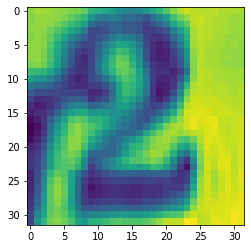

In [5]:
# Plot a random image for checking purposes
plt.imshow(X_train[np.random.randint(0,X_train.shape[0]-1),:,:])

In [6]:
# Check the number of images in the training and testing data.
len(X_train), len(X_test), len(X_val)

(42000, 18000, 60000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

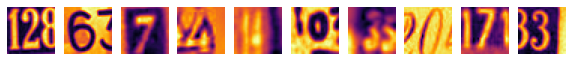

label for each of the above image: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [52]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="inferno") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**
The following step will be performed to prepare the data for the analyses:
- Check the shape of the images;
- Reshape the train and the test dataset to make them fit the first convolutional operation
- Normalize The train and the test dataset (dividing by 255)
- The target variable will be processed and tranformed into one-hot encode

In [8]:
# Shape of the images and the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset by flatten them. 4D array must be given as CNNs input
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalize inputs
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Check reshape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [12]:
# One-hot encoding the output
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Check the labels
print(y_train)
print(y_test)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


## **CNN Model Building**

In [13]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [14]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function to build model architecture
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adamax(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [15]:
#Build the model
model_1 = cnn_model_1()

2022-03-01 11:04:00.761162: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-01 11:04:00.761219: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (francesco-ThinkPad-T450s): /proc/driver/nvidia/version does not exist
2022-03-01 11:04:00.763344: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [21]:
# Viszalization libraries
#!pip3 install graphviz
#!pip install pydot
#!pip3 install pydotplus
#!pip3 install keras-visualizer

In [54]:
import pydot

#Build dot model to export
dot_mod = tf.keras.utils.model_to_dot(model_1,show_shapes=False,show_dtype=False,show_layer_names=False,rankdir="LR",expand_nested=False,dpi=96,subgraph=False,layer_range=None,show_layer_activations=False,)

#Export dot to png of CNN architecture
dot_mod.write_png('GraphCNN.png')

True

In [27]:
# Fit the model
history_model_1 = model_1.fit(X_train,y_train,validation_split=0.2,batch_size=32,epochs=20,verbose=1)

Epoch 1/20
1050/1050 [==============================] - 61s 57ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.0974
Epoch 2/20
1050/1050 [==============================] - 63s 60ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 3/20
1050/1050 [==============================] - 64s 61ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 4/20
1050/1050 [==============================] - 65s 62ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 5/20
1050/1050 [==============================] - 65s 62ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 6/20
1050/1050 [==============================] - 66s 63ms/step - loss: 2.3027 - accuracy: 0.1017 - val_loss: 2.3044 - val_accuracy: 0.0974
Epoch 7/20
1050/1050 [==============================] - 63s 60ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3029 -

### **Plotting the validation and training accuracies**

In [9]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

NameError: name 'history_model_1' is not defined

In [ ]:
def plot_loss(history_model_1):
    plt.plot(history_model_1.history['loss'], label='loss')
    plt.plot(history_model_1.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()

plot_loss(history_model_1)
print(np.min(history_model_1.history['val_loss']))

**Observations:**
- The accuracy in the validation dataset is lower than in the training, which implies that the model is overfitting the data;
- The model can be improved to avoid overfitting and provide more generalization on the data; 

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

In [55]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adamax(learning_rate=0.001)
    
    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

In [56]:
# Build the model
model_2 = cnn_model_2()

In [57]:
#Print the summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                        

In [58]:
# Fit the model
history_model_2 = model_2.fit(X_train,y_train,validation_split=0.2,batch_size=128,epochs=30,verbose=1)

2022-03-01 11:20:54.920997: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 137625600 exceeds 10% of free system memory.


Epoch 1/30
 26/263 [=>............................] - ETA: 2:30 - loss: 2.4838 - accuracy: 0.1175

KeyboardInterrupt: 

### **Plotting the validation and training accuracies**

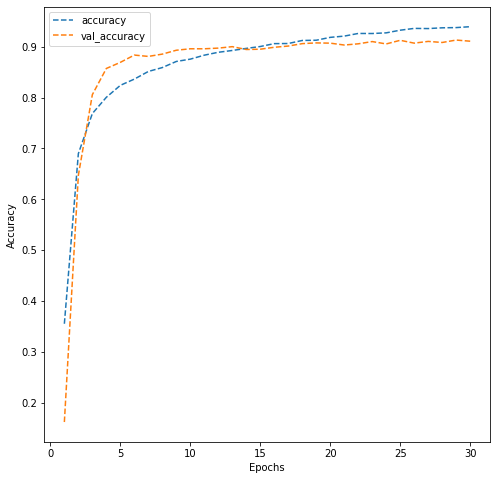

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
def plot_loss(history_model_2):
    plt.plot(history_model_2.history['loss'], label='loss')
    plt.plot(history_model_2.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()

plot_loss(history_model_2)
print(np.min(history_model_2.history['val_loss']))

**Observations:**
- This model makes use of regularization strategies such as batch normalization and dropout learning;
- The model is deeper than the previous one and uses more convolutional layers;
- Despite the fact that model_2 is deeper than model_1, it has less trainable parameters: this can be explained by the fact that more than one convolutional layer is used as well as pooling has been employed twice;
- The model shows a better preformance and the accuracy on the validation dataset is well balanced and close to the accuracy of the training dataset;
- The deeper network with additional convolutional layers has made the model more accurate but also more generalized;

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1814
           1       0.90      0.91      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.91      0.88      0.89      1719
           4       0.94      0.91      0.93      1812
           5       0.90      0.91      0.91      1768
           6       0.90      0.89      0.90      1832
           7       0.95      0.92      0.94      1808
           8       0.88      0.90      0.89      1812
           9       0.90      0.90      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



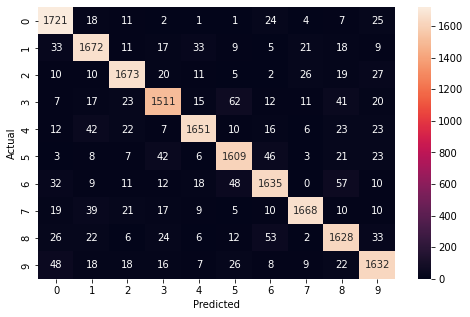

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- The CNN algorithm provides a higher accuracy in predicting house numbers than the ANN;
- Two models were evaluated: a shallower model with 2 convolutional layer, and a deeper model with 4 convolutional layers;
- The deeper model ouperforms the shallower model a provides a more accurate prediction;
- The deeper model has a reduced overfitting and is sufficiently generalized;
- The deeper model has less trainable parameters because it has more convolutional layers;
- The smalles recall is around 90%, roughly a 20% increase when compared to ANN: it proves that CNN should be used for image classification problems;
- The confusion matrix provides low out-of-diagonal values, meaning that predictions are accurate and digit confusions (mistaking a 5 for a 6) is removed by CNN;
